Виконувати у форматі ноутбуків. Розробити вказані типи 1. Розробити засоби для обліку робіт, які виконують бригади стосовно побудови та обслуговування автотраси. Бригада характеризується власним числовим ідентифікатором, назвою і кількістю працівників. Робота характеризується назвою, числовим ідентифікатором, і тарифом оплати праці за виконання роботи на 1 км траси. Наряд на роботу містить дату, ідентифікатор бригади, ідентифікатор роботи і довжину ділянки траси, на якій була виконана робота. Наряди подані кількома (не менше 2) окремими csv-файлами, також окремими файлами подано дані про бригади та види робіт. 2.
 Вивести: 
 
(а) таблицю, в якій для кожного виду робіт пораховано зароблені кошти за весь час; результати впорядкувати за спаданням коштів; 

(б) діаграму до попереднього пункту; 

(в) для бригади, назва якої вибирається з випадаючого списку, зна- йти заробіток одного працівника за весь час; 

(г) таблицю, в якій для кожної бригади пораховано загальну довжину траси для кожного виду робіт, за період часу, визначений віджетами для задання дат.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [53]:
brygada_df = pd.read_csv('brygada.csv')
work_df = pd.read_csv('work.csv')
naryad1 = pd.read_csv('naryad1.csv')
naryad2 = pd.read_csv('naryad2.csv')

In [54]:
naryad_df = pd.concat([naryad1,naryad2], ignore_index= True)


(а) таблицю, в якій для кожного виду робіт пораховано зароблені кошти за весь час; результати впорядкувати за спаданням коштів; 


In [55]:
df = naryad_df.merge(brygada_df, on = 'id_brygada')
df = df.merge(work_df, on = 'id_work')
df

,date,id_brygada,id_work,km,name_brygada,count_workers,work_name,taryf_km
0,15.09.2023,11,3030,56,litchuk,6,kolotchykkk,12
1,12.09.2023,11,1111,90,litchuk,6,brukivka,6
2,22.12.2023,33,2020,23,plutoniska,8,litannya,3
3,12.09.2023,22,2020,45,verstalwsk,12,litannya,3


In [56]:
df['all_money'] = df['km'] * df['taryf_km']
df

,date,id_brygada,id_work,km,name_brygada,count_workers,work_name,taryf_km,all_money
0,15.09.2023,11,3030,56,litchuk,6,kolotchykkk,12,672
1,12.09.2023,11,1111,90,litchuk,6,brukivka,6,540
2,22.12.2023,33,2020,23,plutoniska,8,litannya,3,69
3,12.09.2023,22,2020,45,verstalwsk,12,litannya,3,135


In [57]:
group_work = df.groupby('work_name')['all_money'].sum()
group_work = group_work.sort_values(ascending = False)
group_work

work_name
kolotchykkk    672
brukivka       540
litannya       204
Name: all_money, dtype: int64

(б) діаграму до попереднього пункту; 

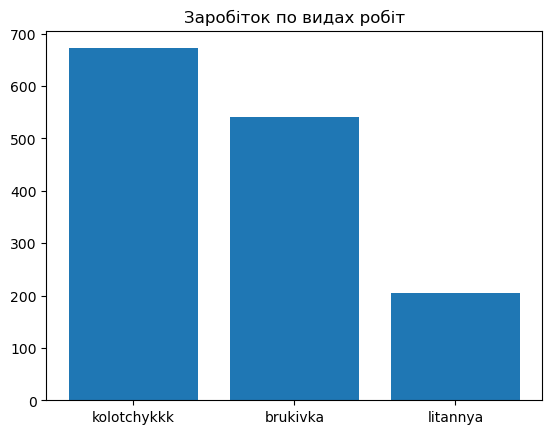

In [58]:
plt.bar(group_work.index, group_work.values)
plt.title("Заробіток по видах робіт")
plt.show()

для бригади, назва якої вибирається з випадаючого списку, зна- йти заробіток одного працівника за весь час; 

In [59]:
def salary_worker(brigade):
    salary_df = df[df['name_brygada'] == brigade]
    sal_0 = salary_df.groupby('work_name')['all_money'].sum()
    sal_1 = sal_0.values / salary_df['count_workers']
    sal_1 = sal_1.values.mean()
    print(sal_1)

In [60]:
widgets.interact(salary_worker, brigade = brygada_df['name_brygada'])
print()

interactive(children=(Dropdown(description='brigade', options=('litchuk', 'verstalwsk', 'plutoniska'), value='…


(г) таблицю, в якій для кожної бригади пораховано загальну довжину траси для кожного виду робіт, за період часу, визначений віджетами для задання дат.

In [64]:
def brigade_km(date1, date2):
    date1 = pd.to_datetime(date1, format = '%d.%m.%Y')
    date2 = pd.to_datetime(date2, format = '%d.%m.%Y')
    df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y')
    km_df = df[(df['date'] >= date1) & (df['date'] <= date2)]
    group1 = km_df.groupby('work_name')['km'].sum()
    print(group1)
    

In [65]:
widgets.interact(brigade_km, date1 = naryad_df['date'].unique(), date2 = naryad_df['date'].unique())
print()

interactive(children=(Dropdown(description='date1', options=('15.09.2023', '22.12.2023', '12.09.2023'), value=…

 Робота характеризується назвою, числовим ідентифікатором, і тарифом оплати праці за виконання роботи на 1 км траси.

In [63]:
class Work():
    def __init__(self, name, id, taryf):
        self.__name = name
        self.__id = id
        self.__taryf = taryf
        
    @property
    def name():
        return self.__name
    
    @name.setter
    def name(n):
        self.__name = n
        
    @property
    def id():
        return self.__id
    
    @id.setter
    def id(n):
        self.__id = n
        
    @property
    def taryf():
        return self.__taryf
    
    @taryf.setter
    def taryf(n):
        self.__taryf = n
        
    def __str__(self):
        return f"Work name: {self.__name}\nID: {self.__id}\nTaryf: {self.__taryf}"
        
c = Work('lyttya', 122, 80)
print(c)
        
        

Work name: lyttya
ID: 122
Taryf: 80
